In [1]:
import matplotlib.pyplot as plt 
import os 
import tensorflow as tf
from tensorflow import keras 
import numpy as np 
import pandas as pd 
import cv2 


In [148]:
from keras.utils import to_categorical
from sklearn.metrics import f1_score


In [2]:
Xdata = np.load("C://Users//jiwon//python codes//signLanguage//X.npy")
display(Xdata)
print(Xdata.shape)
print("Total data is", len(Xdata))

array([[[0.46666667, 0.4745098 , 0.47843137, ..., 0.5176471 ,
         0.5137255 , 0.5019608 ],
        [0.49803922, 0.4862745 , 0.4862745 , ..., 0.5254902 ,
         0.5176471 , 0.50980395],
        [0.54509807, 0.49411765, 0.49019608, ..., 0.5294118 ,
         0.5254902 , 0.5137255 ],
        ...,
        [0.5019608 , 0.5137255 , 0.5176471 , ..., 0.5529412 ,
         0.54509807, 0.53333336],
        [0.49803922, 0.5058824 , 0.5137255 , ..., 0.54509807,
         0.53333336, 0.52156866],
        [0.49019608, 0.49803922, 0.5019608 , ..., 0.5294118 ,
         0.52156866, 0.50980395]],

       [[0.59607846, 0.60784316, 0.61960787, ..., 0.4627451 ,
         0.4509804 , 0.44313726],
        [0.60784316, 0.61960787, 0.6313726 , ..., 0.4745098 ,
         0.4627451 , 0.4509804 ],
        [0.6156863 , 0.627451  , 0.6431373 , ..., 0.4862745 ,
         0.4745098 , 0.4627451 ],
        ...,
        [0.50980395, 0.5176471 , 0.5254902 , ..., 0.40392157,
         0.39607844, 0.3882353 ],
        [0.5

(2062, 64, 64)
Total data is 2062


(2062, 10)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


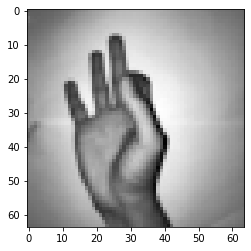

In [3]:
plt.imshow(Xdata[0,:,:], cmap = "gray")
Ydata = np.load("C://Users//jiwon//python codes//signLanguage//Y.npy")
print(Ydata.shape)
print()
print(Ydata[0])

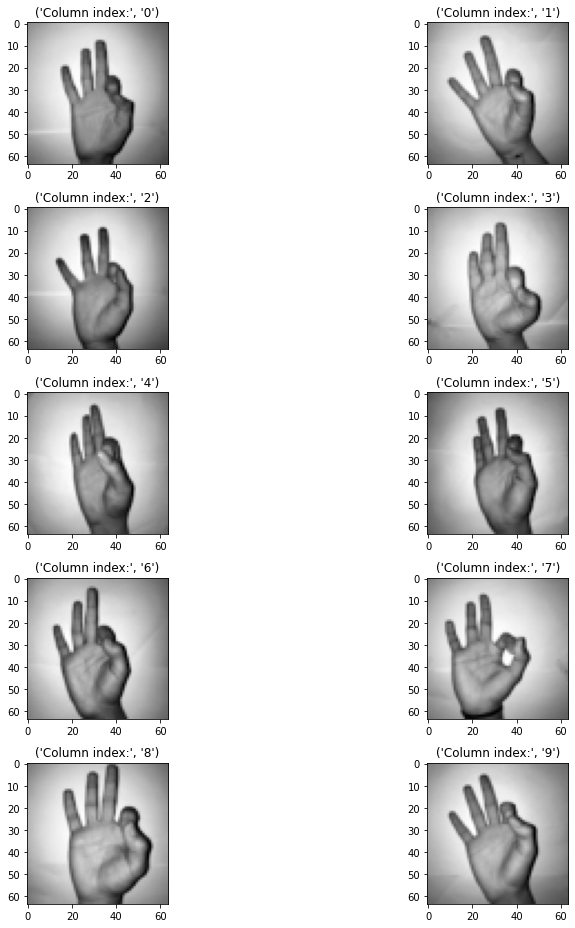

In [4]:
fig, axes = plt.subplots(figsize = (13,13), nrows = 5, ncols = 2)
index = 0; 
for i in range(1, 11): 
    plt.subplot(5,2, i)
    plt.tight_layout()
    plt.imshow(Xdata[i], cmap = "gray")
    plt.title(label = ("Column index:", str(i-1)))
    


In [5]:
print((Xdata.shape))
print((Ydata.shape))

(2062, 64, 64)
(2062, 10)


In [6]:
np.random.seed(32)
randomData = [1,2,3,4,5,6]
randomData2 = [10,9,8,7,6,5]
np.random.shuffle(randomData)
np.random.seed(32)
np.random.shuffle(randomData2)
display(randomData)
display(randomData2)

[6, 2, 1, 3, 5, 4]

[5, 9, 10, 8, 6, 7]

In [7]:
np.random.seed(58)
np.random.shuffle(Xdata)
np.random.seed(58)
np.random.shuffle(Ydata)

X_train, X_test = Xdata[:1402],Xdata[1402:]
Y_train, Y_test = Ydata[:1402],Ydata[1402:] 

Double check to see if it is randomly distributed

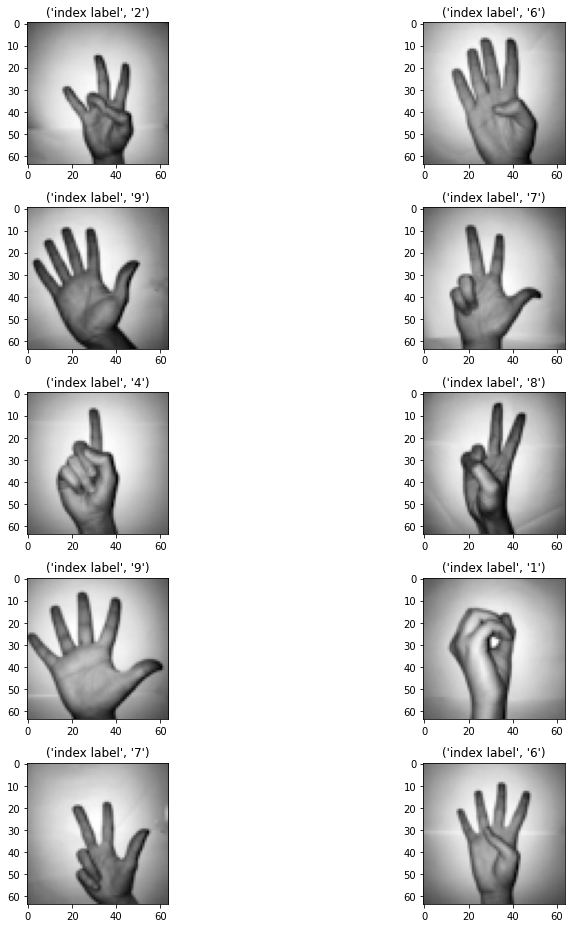

In [8]:
def indexTracker(x):
    "x is a numpy array"
    for i in range(len(x)):
        if x[i] == 1: 
            return i; 
    return 0;      


plt.figure(figsize = (13,13))
for i in range(10):
    plt.subplot(5,2, i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap = "gray")
    indexLabel = indexTracker(Y_train[i])
    plt.title(("index label", str(indexLabel)))

In [9]:
#activation and regularizer 
l2Reg = keras.regularizers.L2(l2 = 0.00004)
leakyRelu = keras.layers.LeakyReLU(alpha = 0.12)

leakyRelu2 = keras.layers.LeakyReLU(alpha = 0.39)
#activation 
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameter


def model_builder(hp):
    model1= keras.models.Sequential([])
    model1.add(keras.layers.Input(shape = (64,64,1)))
    model1.add(keras.layers.BatchNormalization())

    model1.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (3,3), padding = "same", kernel_initializer = "he_uniform", activation = leakyRelu, kernel_regularizer= l2Reg))
    model1.add(keras.layers.MaxPool2D(pool_size = (3,3), strides = 2,  padding = "same"))
    model1.add(keras.layers.BatchNormalization())


    model1.add(keras.layers.Conv2D(filters= hp.Int("units2", min_value = 96, max_value = 192, step = 32), kernel_size = (3,3), padding = "same", strides = hp.Int("strideSize2", min_value = 1, max_value = 3, step = 2), kernel_initializer = "he_uniform", activation = leakyRelu2, kernel_regularizer = l2Reg))
    model1.add(keras.layers.MaxPool2D(pool_size = (2,2), strides= 2, padding = "valid"))
    model1.add(keras.layers.BatchNormalization())



    model1.add(keras.layers.Flatten())
    model1.add(keras.layers.Dense(units = hp.Int('denseUnits', min_value= 64, max_value = 160, step= 32), kernel_initializer = "lecun_normal", activation = tf.nn.selu, kernel_regularizer = l2Reg))
    model1.add(keras.layers.BatchNormalization())
    model1.add(keras.layers.Dropout(0.2))
    model1.add(keras.layers.Dense(units = hp.Int('denseUnits2', min_value =64, max_value = 96, step = (96-64)), kernel_initializer = "lecun_normal", activation = tf.nn.selu, kernel_regularizer = l2Reg))
    model1.add(keras.layers.BatchNormalization())
    model1.add(keras.layers.Dropout(0.2))
    model1.add(keras.layers.Dense(units = 10, kernel_initializer= "he_uniform", activation = "softmax", kernel_regularizer = l2Reg))
    

    model1.compile(loss = "categorical_crossentropy", metrics = "accuracy",optimizer = "Adam")
    return model1 

In [10]:
tuner = RandomSearch(model_builder, objective = "val_accuracy", max_trials = 50, executions_per_trial = 1,  directory = "my_dir2", project_name = "SignLanguageDetection")
tuner.search_space_summary()

INFO:tensorflow:Reloading Oracle from existing project my_dir2\SignLanguageDetection\oracle.json
INFO:tensorflow:Reloading Tuner from my_dir2\SignLanguageDetection\tuner0.json
Search space summary
Default search space size: 4
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 96, 'max_value': 192, 'step': 32, 'sampling': None}
strideSize2 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 2, 'sampling': None}
denseUnits (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 160, 'step': 32, 'sampling': None}
denseUnits2 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 96, 'step': 32, 'sampling': None}


In [72]:
tuner.search(X_train[:1100], Y_train[:1100], batch_size = 58, epochs = 15, validation_data = (X_train[1100:], Y_train[1100:]))

INFO:tensorflow:Oracle triggered exit


In [20]:
model = tuner.get_best_hyperparameters(1)[0].values
display(model)

{'units2': 192, 'strideSize2': 1, 'denseUnits': 128, 'denseUnits2': 64}

In [25]:
model= keras.models.Sequential([])
model.add(keras.layers.Input(shape = (64,64,1)))
model.add(keras.layers.BatchNormalization())



model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (3,3), padding = "same", kernel_initializer = "he_uniform", activation = leakyRelu, kernel_regularizer= l2Reg))
model.add(keras.layers.MaxPool2D(pool_size = (3,3), strides = 2,  padding = "same"))
model.add(keras.layers.BatchNormalization())



model.add(keras.layers.Conv2D(filters= 192, kernel_size = (3,3), padding = "same", strides = 1, kernel_initializer = "he_uniform", activation = leakyRelu2, kernel_regularizer = l2Reg))
model.add(keras.layers.MaxPool2D(pool_size = (2,2), strides= 2, padding = "valid"))
model.add(keras.layers.BatchNormalization())



model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, kernel_initializer = "lecun_normal", activation = tf.nn.selu, kernel_regularizer = l2Reg))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units = 64, kernel_initializer = "lecun_normal", activation = tf.nn.selu, kernel_regularizer = l2Reg))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units = 10, kernel_initializer= "he_uniform", activation = "softmax", kernel_regularizer = l2Reg))
    

model.compile(loss = "categorical_crossentropy", metrics = "accuracy",optimizer = "Adam")

callback = keras.callbacks.ModelCheckpoint(monitor = "val_accuracy", mode = "max", save_best_only= True, filepath = "SignDetection1.h5")

history = model.fit(X_train[:1100], Y_train[:1100], validation_data = (X_train[1100:], Y_train[1100:]), callbacks = [callback], epochs = 30, batch_size = 58)

Epoch 1/30
19/19 [==============================] - 5s 149ms/step - loss: 1.3463 - accuracy: 0.5755 - val_loss: 3.2319 - val_accuracy: 0.1126
Epoch 2/30
19/19 [==============================] - 2s 123ms/step - loss: 0.5373 - accuracy: 0.8391 - val_loss: 2.3170 - val_accuracy: 0.3907
Epoch 3/30
19/19 [==============================] - 2s 124ms/step - loss: 0.3107 - accuracy: 0.9273 - val_loss: 1.6598 - val_accuracy: 0.4272
Epoch 4/30
19/19 [==============================] - 2s 121ms/step - loss: 0.2160 - accuracy: 0.9573 - val_loss: 1.5872 - val_accuracy: 0.4371
Epoch 5/30
19/19 [==============================] - 2s 127ms/step - loss: 0.1374 - accuracy: 0.9836 - val_loss: 1.5264 - val_accuracy: 0.4503
Epoch 6/30
19/19 [==============================] - 2s 128ms/step - loss: 0.1151 - accuracy: 0.9855 - val_loss: 1.7643 - val_accuracy: 0.3344
Epoch 7/30
19/19 [==============================] - 2s 130ms/step - loss: 0.0982 - accuracy: 0.9891 - val_loss: 1.5023 - val_accuracy: 0.5530
Epoch 

In [26]:
model = keras.models.load_model("SignDetection1.h5")
model.evaluate(X_train[1100:], Y_train[1100:])

10/10 [==============================] - 1s 16ms/step - loss: 0.3075 - accuracy: 0.9238


[0.3074840009212494, 0.9238410592079163]

In [27]:
model.evaluate(X_test, Y_test)

21/21 [==============================] - 0s 19ms/step - loss: 0.3700 - accuracy: 0.8939


[0.37003228068351746, 0.8939393758773804]

In [150]:
Y_predictions1 = to_categorical(model.predict(X_test).argmax(axis = -1))
score = f1_score(Y_test,Y_predictions1, average = None)
print(score)
print(np.average(score))

21/21 [==============================] - 1s 17ms/step
[0.87407407 0.96666667 0.87218045 0.80882353 0.94488189 0.87407407
 0.85483871 0.93233083 0.86896552 0.95454545]
0.8951381193650102


Second model to try to construct and evaluate 

In [102]:
#activation and regularizer 
l2Reg = keras.regularizers.L2(l2 = 0.00005)
leakyRelu = keras.layers.LeakyReLU(alpha = 0.19)

leakyRelu2 = keras.layers.LeakyReLU(alpha = 0.39)
#activation 
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameter


def model_builder2(hp):
    model2= keras.models.Sequential([])
    model2.add(keras.layers.Input(shape = (64,64,1)))
    model2.add(keras.layers.BatchNormalization())

    model2.add(keras.layers.Conv2D(filters = 32, kernel_size = hp.Int("ksize1", min_value = 3, max_value = 5, step = 2), strides = (3,3), padding = "same", kernel_initializer = "he_uniform", activation = leakyRelu, kernel_regularizer= l2Reg))
    model2.add(keras.layers.MaxPool2D(pool_size = (3,3), strides = 2,  padding = "same"))
    model2.add(keras.layers.BatchNormalization())

    model2.add(keras.layers.Conv2D(filters= hp.Int("units2", min_value = 32, max_value = 128, step = 32), kernel_size = (3,3), padding = "same", strides = hp.Int("strideSize2", min_value = 1, max_value = 3, step = 2), kernel_initializer = "he_uniform", activation = leakyRelu, kernel_regularizer = l2Reg))
    model2.add(keras.layers.MaxPool2D(pool_size = (2,2), strides= 2, padding = "same"))
    model2.add(keras.layers.BatchNormalization())

    model2.add(keras.layers.Flatten())
    model2.add(keras.layers.Dense(units = hp.Int('denseUnits', min_value= 64, max_value = 128, step= 32), kernel_initializer = "lecun_normal", activation = tf.nn.selu, kernel_regularizer = l2Reg))
    model2.add(keras.layers.BatchNormalization())
    model2.add(keras.layers.Dropout(0.20))


    model2.add(keras.layers.Dense(units = hp.Int('denseUnits2', min_value= 32, max_value = 128, step= 32), kernel_initializer = "lecun_normal", activation = tf.nn.selu, kernel_regularizer = l2Reg))
    model2.add(keras.layers.BatchNormalization())
    model2.add(keras.layers.Dropout(0.20))


    model2.add(keras.layers.Dense(units = 10, kernel_initializer= "he_uniform", activation = "softmax", kernel_regularizer = l2Reg))
    
    model2.compile(loss = "categorical_crossentropy", metrics = "accuracy",optimizer = "Adam")
    return model2 

In [103]:
tuner = RandomSearch(model_builder2, objective = "val_accuracy", max_trials = 90, executions_per_trial = 1,  directory = "my_dir3", project_name = "SignLanguageDetection2.h5")
tuner.search_space_summary()

Search space summary
Default search space size: 5
ksize1 (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 5, 'step': 2, 'sampling': None}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': None}
strideSize2 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 2, 'sampling': None}
denseUnits (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 128, 'step': 32, 'sampling': None}
denseUnits2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': None}


In [104]:
tuner.search(X_train[:1100], Y_train[:1100], batch_size = 58, epochs = 20, validation_data = (X_train[1100:], Y_train[1100:]))

Trial 71 Complete [00h 00m 21s]
val_accuracy: 0.7715231776237488

Best val_accuracy So Far: 0.9370861053466797
Total elapsed time: 00h 31m 50s
INFO:tensorflow:Oracle triggered exit


In [110]:
model2Vals = tuner.get_best_hyperparameters(1)[0].values
display(model2Vals)

{'ksize1': 5,
 'units2': 128,
 'strideSize2': 1,
 'denseUnits': 64,
 'denseUnits2': 96}

In [135]:
model2= keras.models.Sequential([])
model2.add(keras.layers.Input(shape = (64,64,1)))
model2.add(keras.layers.BatchNormalization())

model2.add(keras.layers.Conv2D(filters = 32, kernel_size = 5, strides = (3,3), padding = "same", kernel_initializer = "he_uniform", activation = leakyRelu, kernel_regularizer= l2Reg))
model2.add(keras.layers.MaxPool2D(pool_size = (3,3), strides = 2,  padding = "same"))
model2.add(keras.layers.BatchNormalization())

model2.add(keras.layers.Conv2D(filters= 128, kernel_size = (3,3), padding = "same", strides = 1, kernel_initializer = "he_uniform", activation = leakyRelu, kernel_regularizer = l2Reg))
model2.add(keras.layers.MaxPool2D(pool_size = (2,2), strides= 2, padding = "same"))
model2.add(keras.layers.BatchNormalization())

model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(units = 64, kernel_initializer = "lecun_normal", activation = tf.nn.selu, kernel_regularizer = l2Reg))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dropout(0.20))


model2.add(keras.layers.Dense(units = 96, kernel_initializer = "lecun_normal", activation = tf.nn.selu, kernel_regularizer = l2Reg))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dropout(0.20))


model2.add(keras.layers.Dense(units = 10, kernel_initializer= "he_uniform", activation = "softmax", kernel_regularizer = l2Reg))
    
model2.compile(loss = "categorical_crossentropy", metrics = "accuracy",optimizer = "Adam")
    

In [136]:
earlyStopping = keras.callbacks.EarlyStopping(monitor = "val_accuracy", mode = "max", min_delta = 1e-4,patience = 8, restore_best_weights = True)
history = model2.fit(X_train[:1100], Y_train[:1100], validation_data = (X_train[1100:], Y_train[1100:]), callbacks = [earlyStopping], epochs = 40, batch_size = 58)

Epoch 1/40
19/19 [==============================] - 4s 103ms/step - loss: 1.2725 - accuracy: 0.5864 - val_loss: 2.6439 - val_accuracy: 0.1987
Epoch 2/40
19/19 [==============================] - 2s 79ms/step - loss: 0.5666 - accuracy: 0.8273 - val_loss: 2.1298 - val_accuracy: 0.3609
Epoch 3/40
19/19 [==============================] - 2s 82ms/step - loss: 0.3496 - accuracy: 0.9009 - val_loss: 2.1128 - val_accuracy: 0.2947
Epoch 4/40
19/19 [==============================] - 2s 83ms/step - loss: 0.2349 - accuracy: 0.9464 - val_loss: 2.1417 - val_accuracy: 0.2682
Epoch 5/40
19/19 [==============================] - 2s 86ms/step - loss: 0.1630 - accuracy: 0.9755 - val_loss: 1.8359 - val_accuracy: 0.3907
Epoch 6/40
19/19 [==============================] - 2s 90ms/step - loss: 0.1203 - accuracy: 0.9855 - val_loss: 1.6818 - val_accuracy: 0.5762
Epoch 7/40
19/19 [==============================] - 2s 96ms/step - loss: 0.0855 - accuracy: 0.9973 - val_loss: 1.5186 - val_accuracy: 0.6060
Epoch 8/40
1

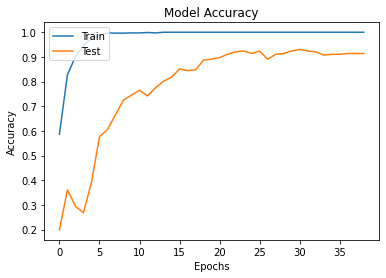

In [139]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [137]:
model2.evaluate(X_train[1100:], Y_train[1100:])

10/10 [==============================] - 0s 13ms/step - loss: 0.2775 - accuracy: 0.9305


[0.2775406539440155, 0.9304635524749756]

In [138]:
model2.evaluate(X_test, Y_test)

21/21 [==============================] - 0s 15ms/step - loss: 0.3745 - accuracy: 0.8848


[0.3744948208332062, 0.8848484754562378]

In [149]:
Y_predictions2 = to_categorical(model2.predict(X_test).argmax(axis = -1))
score = f1_score(Y_test,Y_predictions2, average = None)
print(score)
print(np.average(score))

21/21 [==============================] - 0s 12ms/step
[0.89230769 0.96666667 0.87218045 0.75590551 0.96124031 0.86363636
 0.81889764 0.92086331 0.84415584 0.96124031]
0.8857094097008243
